# De-noising the recording

The raw `wav` file of the recording has a significant amount of noise.

This noise could be identified by transforming the recording to the fourier domain, and obtaining frequencies of lower amplitude than a defined threshold.

These frequencies can then be removed, and an inverse fourier transform could be applied to re-obtain the sound, now de-noised.

Read in the `wav` file and list its attributes.

In [66]:
from scipy.io import wavfile
import numpy as np
import warnings

warnings.filterwarnings("ignore")

rate, data = wavfile.read('recordings/001.wav')

# length of recording
time_duration = data.shape[0] / rate

print(f'Number of channels {data.shape[1]}; Time duration of recording {time_duration}')

Number of channels 2; Time duration of recording 15.512312925170068



Since the recordings to be de-noised are from a guitar riff, it is a non-stationary signal. So, to analyze the frequency domain, we will use `stft` to analyze the frequency domain of short intervals instead.

We also want the number of segments of the `stft` to be NOLA (Non-zero OverLap Add). We need to do this so that we can perform `istft` to get back the `wav` file.

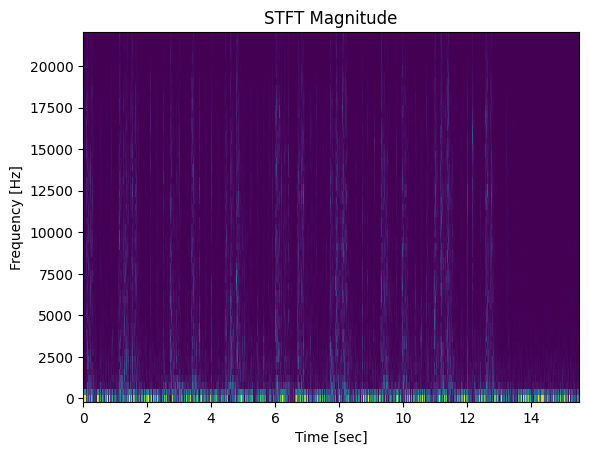

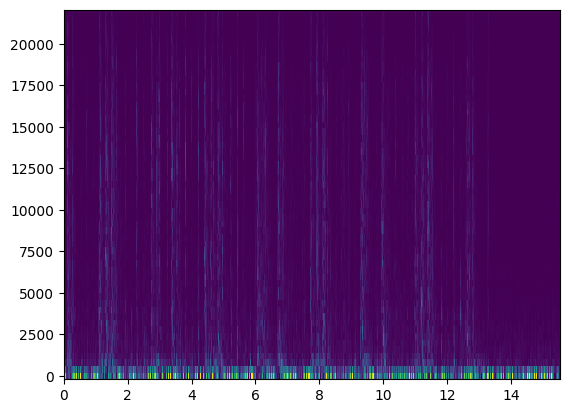

In [67]:
from scipy import signal
import matplotlib.pyplot as plt

nperseg = 111

# Check NOLA
assert(((data.shape[0] - nperseg) % nperseg) == 0)

# Transpose to obtain both channels
channels = data.T

# Channel 1 stft
f_1, t_1, Zxx_1 = signal.stft(channels[0], rate, nperseg=nperseg)
plt.pcolormesh(t_1, f_1, np.abs(Zxx_1), shading='auto')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Channel 2 stft
f_2, t_2, Zxx_2 = signal.stft(channels[1], rate, nperseg=nperseg)
plt.pcolormesh(t_2, f_2, np.abs(Zxx_1), shading='auto')
plt.show()